# Regression

## Single hidden layer 

In [1]:
import nnfs
import numpy as np
from nnfs.datasets import sine_data

In [2]:
nnfs.init()

In [3]:
import os
import sys

module = os.path.abspath(os.path.join(".."))
if module not in sys.path:
    sys.path.append(module)

In [4]:
from Chpt_14.Updated_Classes import *

In [5]:
%run Linear_Activation.ipynb

In [6]:
%run MSE_Loss.ipynb

In [7]:
X, y = sine_data()

In [8]:
dense1 = Layer_Dense(1, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 1)
activation2 = Activation_Linear()

In [9]:
loss_activation = MeanSquaredError_Loss()

In [10]:
from Chpt_10.Optimizers import Optimizer_Adam

In [11]:
optimizer = Optimizer_Adam()

In [12]:
accuracy_precision = np.std(y) / 250

In [13]:
for epoch in range(10001):

    dense1.forward(X)
    activation1.forward(dense1.output)
    
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    data_loss = loss_activation.calculate(activation2.output, y)

    regularization_loss = loss_activation.regularization_loss(
        dense1
    ) + loss_activation.regularization_loss(dense2)

    loss = data_loss + regularization_loss

    predictions = activation2.output
    accuracy = np.mean(np.abs(predictions - y) < accuracy_precision)

    if not epoch % 100:
        print(
            f"epoch: {epoch}, "
            + f"acc: {accuracy:.3f}, "
            + f"loss: {loss:.3f} ("
            + f"data_loss: {data_loss:.3f}, "
            + f"reg_loss: {regularization_loss:.3f}), "
            + f"lr: {optimizer.current_learning_rate}"
        )

    loss_activation.backward(activation2.output, y)
    activation2.backward(loss_activation.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.002, loss: 0.500 (data_loss: 0.500, reg_loss: 0.000), lr: 0.001
epoch: 100, acc: 0.003, loss: 0.346 (data_loss: 0.346, reg_loss: 0.000), lr: 0.001
epoch: 200, acc: 0.004, loss: 0.163 (data_loss: 0.163, reg_loss: 0.000), lr: 0.001
epoch: 300, acc: 0.003, loss: 0.147 (data_loss: 0.147, reg_loss: 0.000), lr: 0.001
epoch: 400, acc: 0.003, loss: 0.146 (data_loss: 0.146, reg_loss: 0.000), lr: 0.001
epoch: 500, acc: 0.003, loss: 0.146 (data_loss: 0.146, reg_loss: 0.000), lr: 0.001
epoch: 600, acc: 0.004, loss: 0.146 (data_loss: 0.146, reg_loss: 0.000), lr: 0.001
epoch: 700, acc: 0.003, loss: 0.146 (data_loss: 0.146, reg_loss: 0.000), lr: 0.001
epoch: 800, acc: 0.004, loss: 0.146 (data_loss: 0.146, reg_loss: 0.000), lr: 0.001
epoch: 900, acc: 0.004, loss: 0.146 (data_loss: 0.146, reg_loss: 0.000), lr: 0.001
epoch: 1000, acc: 0.004, loss: 0.146 (data_loss: 0.146, reg_loss: 0.000), lr: 0.001
epoch: 1100, acc: 0.003, loss: 0.145 (data_loss: 0.145, reg_loss: 0.000), lr: 0.001
epoc

## Validation 

### Visualization 

In [17]:
import matplotlib.pyplot as plt

In [18]:
X_test, y_test = sine_data()

In [19]:
dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

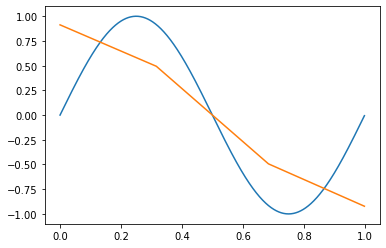

In [20]:
plt.plot(X_test, y_test)
plt.plot(X_test, activation2.output)
plt.show()